In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfa
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Question 1**  
#                       prediction model for profit of 50_startups data.


In [2]:
from google.colab import files
uploaded=files.upload()


Saving 50_Startups.csv to 50_Startups.csv


In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [16]:
print('There are ',df.duplicated().sum(),'duplicated values in the df')

There are  0 duplicated values in the df


# One hot encoding

In [10]:
df_1 = pd.get_dummies(df,columns=['State'])
df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
df_2=df_1.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend' , 'State_New York' : 'State_New_York'},axis=1)

In [13]:
df_2.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
c=df_2.corr()
c

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New_York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


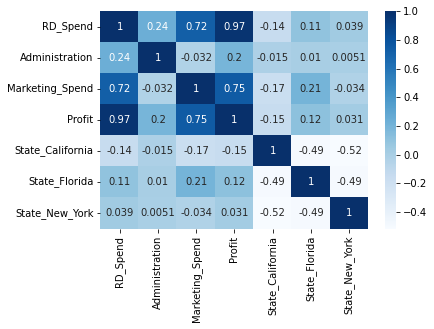

In [15]:
sns.heatmap(c,annot=True,cmap="Blues")
plt.show()

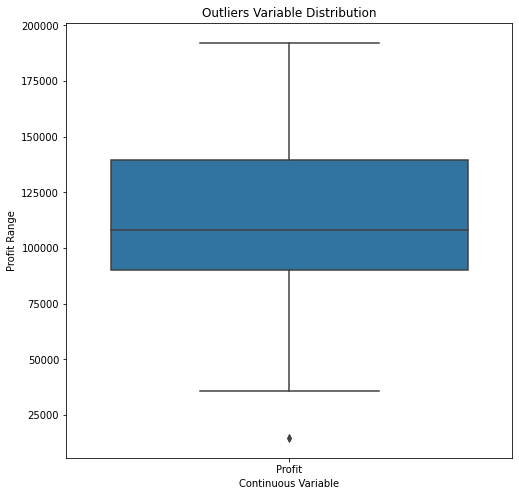

In [17]:
outliers=['Profit']
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=df[outliers])

plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

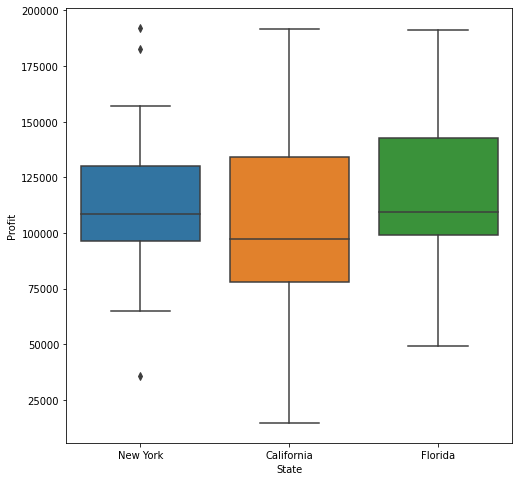

In [22]:
sns.boxplot(x='State',y='Profit',data=df)
plt.show()

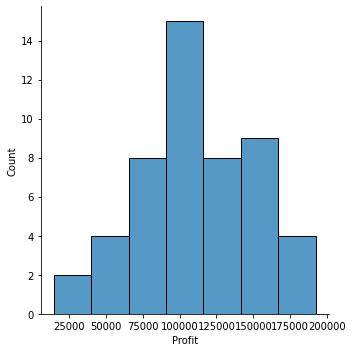

In [ ]:
sns.displot(df['Profit'])
plt.show()

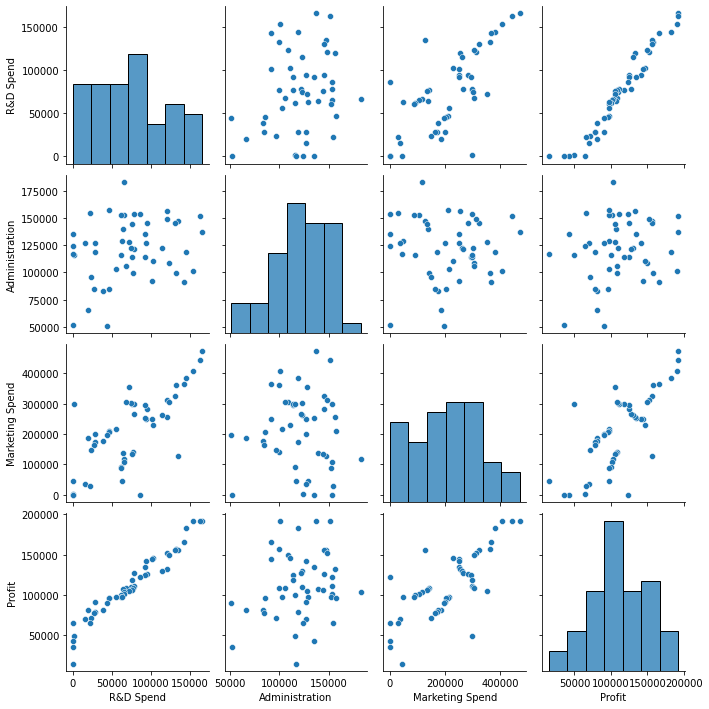

In [ ]:
sns.pairplot(df)
plt.show()

# **Model** **1**

In [24]:
model_1=sfa.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + State_California + State_Florida + State_New_York ',data=df_2).fit()

In [25]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        13:01:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
df_2[df_2.duplicated()]

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York


In [27]:
from matplotlib.cbook import safe_masked_invalid
rsq_RD_Spend = sfa.ols('RD_Spend ~ Administration + Marketing_Spend + State_California + State_Florida + State_New_York',data=df_2).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend)  

rsq_Administration = sfa.ols('Administration ~ RD_Spend + Marketing_Spend + State_California + State_Florida + State_New_York',data= df_2).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = sfa.ols('Marketing_Spend ~ RD_Spend + Administration + State_California + State_Florida + State_New_York',data= df_2).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

rsq_State_California= sfa.ols('State_California ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= df_2).fit().rsquared  
vif_State_California = 1/(1-rsq_State_California) 

rsq_State_Florida= sfa.ols('State_Florida ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= df_2).fit().rsquared  
vif_State_Florida = 1/(1-rsq_State_Florida) 

rsq_State_New_York= sfa.ols('State_California ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= df_2).fit().rsquared  
vif_State_New_York = 1/(1-rsq_State_New_York) 

In [28]:
# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend,vif_State_California,vif_State_Florida,vif_State_New_York]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [30]:
slr_1=sfa.ols('Profit ~ RD_Spend',data=df_2).fit()
slr_1.tvalues , slr_1.pvalues

(Intercept    19.320288
 RD_Spend     29.151139
 dtype: float64, Intercept    2.782697e-24
 RD_Spend     3.500322e-32
 dtype: float64)

In [31]:
slr_2=sfa.ols('Profit ~ Marketing_Spend',data=df_2).fit()
slr_2.tvalues , slr_2.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64, Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [32]:
# RD_Spend and Marketing_Spend one group

In [34]:
mlr=sfa.ols('Profit ~ RD_Spend + Marketing_Spend',data=df_2).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.16e-31
Time:                        13:19:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

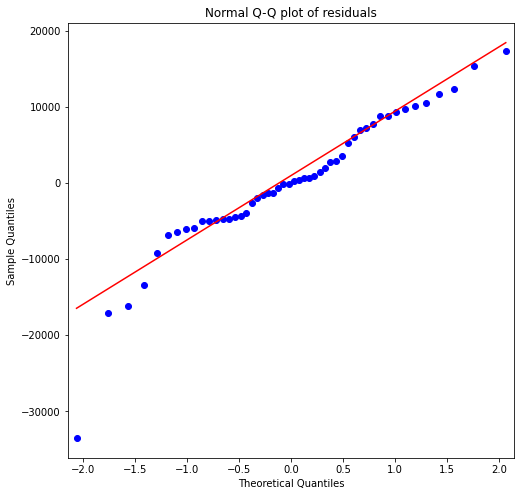

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [37]:
model_2=sfa.ols('Profit ~  Administration + Marketing_Spend + State_California + State_Florida + State_New_York ',data=df_2).fit()

In [38]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.78e-09
Time:                        13:22:18   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.482e+04   1.36e+04      1.091      0.281   -1.25e+04    4.22e+04
Administration       0.3239      0.133      2.426      0.019       0.055       0.593
Marketing_Spend      0.2507      0.031      7.997      0.000       0.188       0.314
State_California  4214.9699   6660.035      0.633      0.530   -9199.028    1.76e+04
State_Florida     2511.2671   7380.550      0.340      0.735   -1.24e+04    1.74e+04
State_New_York    8090.7324   6855.885      1.180      0.244   -5717.730    2.19e+04
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     3.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
model_3=sfa.ols('Profit ~ RD_Spend + Administration + State_California + State_Florida + State_New_York ',data=df_2).fit()

In [41]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.90e-28
Time:                        13:23:18   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
RD_Spend             0.8609      0.031     27.665      0.000       0.798       0.924
Administration      -0.0527      0.050     -1.045      0.301      -0.154       0.049
State_California  1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
State_Florida     1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
State_New_York    1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     1.52e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# p_value is high for Administration

In [43]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

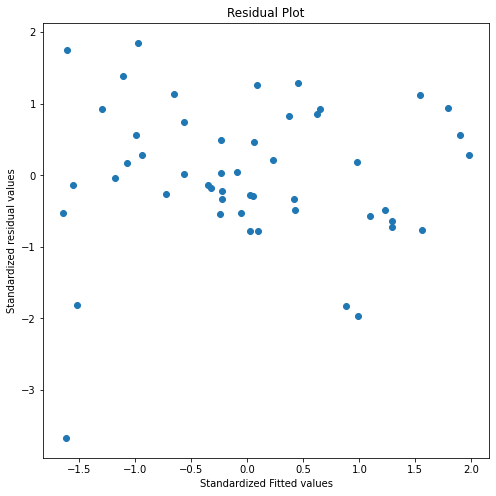

In [44]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

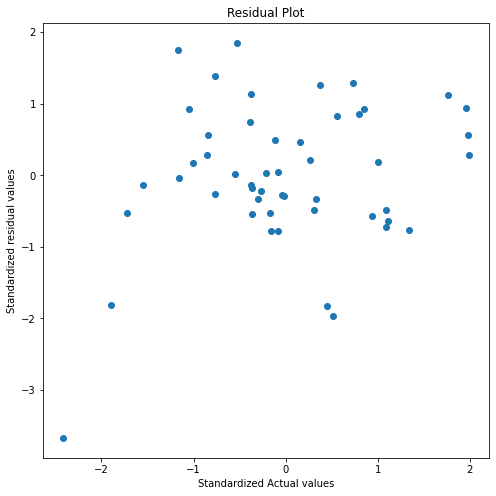

In [46]:
plt.scatter(get_standardized_values(df_2.Profit),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

In [49]:
model_4=sfa.ols('Profit ~ RD_Spend + State_California + State_Florida + State_New_York ',data=df_2).fit() # preparing model by removing Administration
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.76e-29
Time:                        13:32:23   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
RD_Spend             0.8530      0.030     28.226      0.000       0.792       0.914
State_California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
State_Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
State_New_York     1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     1.95e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

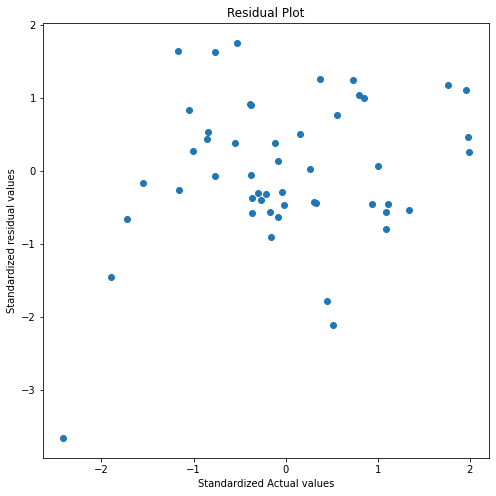

In [51]:
plt.scatter(get_standardized_values(df_2.Profit),
            get_standardized_values(model_4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()


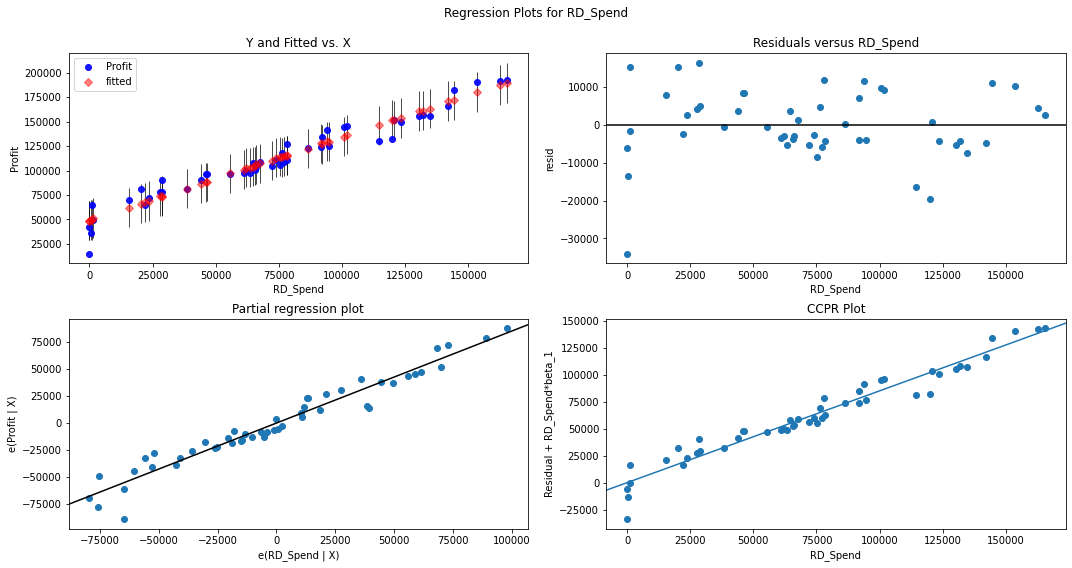

In [52]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_4, "RD_Spend", fig=fig)
plt.show()

In [53]:
model_influence = model_4.get_influence()
(c, _) = model_influence.cooks_distance

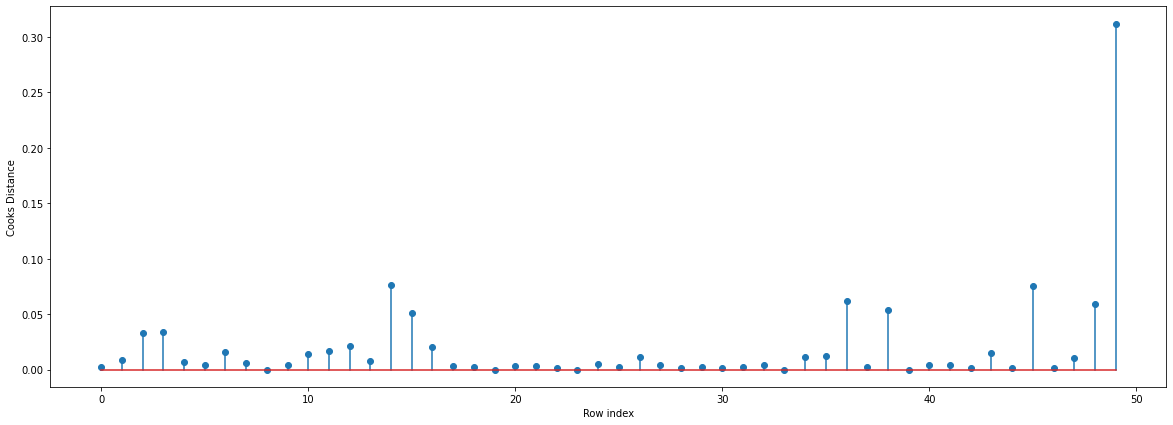

In [54]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(49, 0.31169619437841706)

In [56]:
np.where(c>0.3116)

(array([49]),)

In [57]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df_3 = df_2.drop(df_2.index[[49]],axis=0).reset_index()
df_3.head()



,index,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [58]:
df_3.shape

(49, 8)

In [59]:
model_5 = sfa.ols('Profit ~ RD_Spend + State_California + State_Florida + State_New_York',data=df_3).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     340.4
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.26e-31
Time:                        13:40:38   Log-Likelihood:                -508.42
No. Observations:                  49   AIC:                             1025.
Df Residuals:                      45   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.876e+04   1707.520     22.698      0.000    3.53e+04    4.22e+04
RD_Spend             0.8288      0.026     31.792      0.000       0.776       0.881
State_California  1.379e+04   1704.699      8.089      0.000    1.04e+04    1.72e+04
State_Florida     1.312e+04   1790.310      7.326      0.000    9509.693    1.67e+04
State_New_York    1.185e+04   1717.230      6.902      0.000    8392.789    1.53e+04
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.150
Skew:                          -0.003   Prob(JB):                        0.928
Kurtosis:                       2.729   Cond. No.                     1.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
table=pd.DataFrame({ 'Model':['model_1','model_2','model_3','model_4','model_5'],
                    'R_squared value':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared]})

In [61]:
table

,Model,R_squared value
0,model_1,0.950752
1,model_2,0.613108
2,model_3,0.947980
3,model_4,0.946717
4,model_5,0.957797


Final model is model_5

# Creating model using Sklearn

In [62]:

#spliting Dataset in Dependent & Independent Variables
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
labelencoder= LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
x1=pd.DataFrame(x)
x1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [66]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [67]:
y_pred=model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [68]:
testing_df_model_score=model.score(x_test,y_test)
print("Model Score/Performance on Testing data",testing_df_model_score)

Model Score/Performance on Testing data 0.9355139722149947


In [69]:
training_df_model_score=model.score(x_train,y_train)
print("Model Score/Performance on Training data",training_df_model_score)

Model Score/Performance on Training data 0.9515496105627431


In [70]:
df2=pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})

In [71]:
df2

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [72]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred,y_test)
print("R2 score of model is:",r2Score*100)

R2 score of model is: 93.39448007716635


# Question 2

## **Prediction model for predicting price**

In [5]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.xlsx to ToyotaCorolla.xlsx


In [7]:
data=pd.read_excel('ToyotaCorolla.xlsx')


In [8]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
data1=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [10]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
data1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# EDA Process

In [13]:
#Renaming the columns
data2=data1.rename({'Age_08_04': 'Age','Quarterly_Tax':'Tax'}, axis=1)
data2.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [14]:
#finding Duplicates
data2[data2.duplicated()]   # means there is one duplicate value

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data3= c=data2.drop_duplicates()
data3

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
data3.isna().sum()   #there are no missing values

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   Tax     1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [18]:
data3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


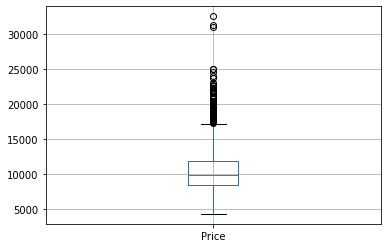

In [19]:
#Outlier Detection
data3.boxplot(column='Price')   

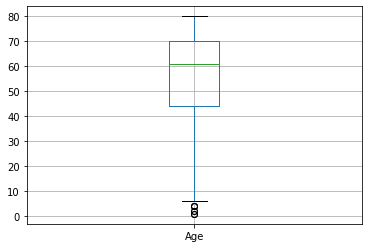

In [20]:
data3.boxplot(column='Age')    #there are outliers

In [21]:
%matplotlib inline

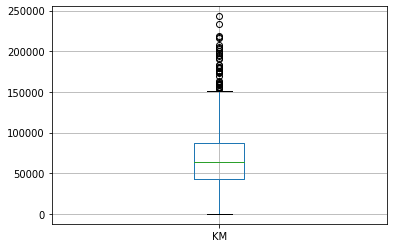

In [22]:
data3.boxplot(column='KM')       #ther are outliers

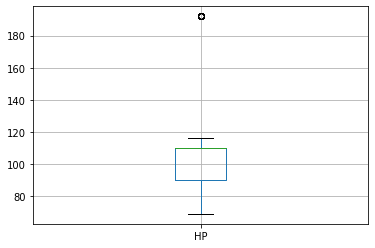

In [23]:
data3.boxplot(column='HP')   

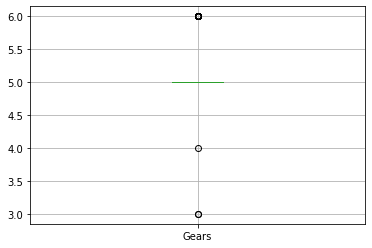

In [24]:
data3.boxplot(column='Gears')

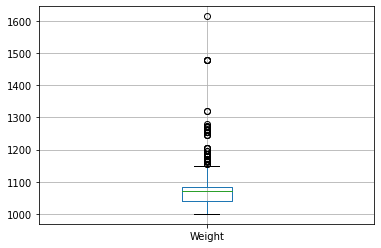

In [25]:
data3.boxplot(column='Weight')


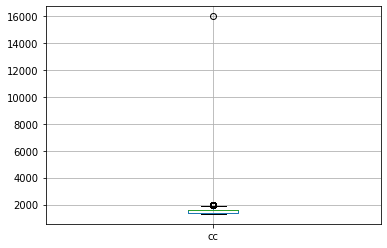

In [26]:
data3.boxplot(column='cc')


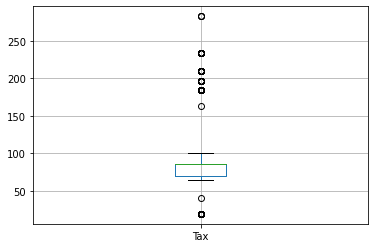

In [27]:
data3.boxplot(column='Tax')


# Correalation

In [28]:
data3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


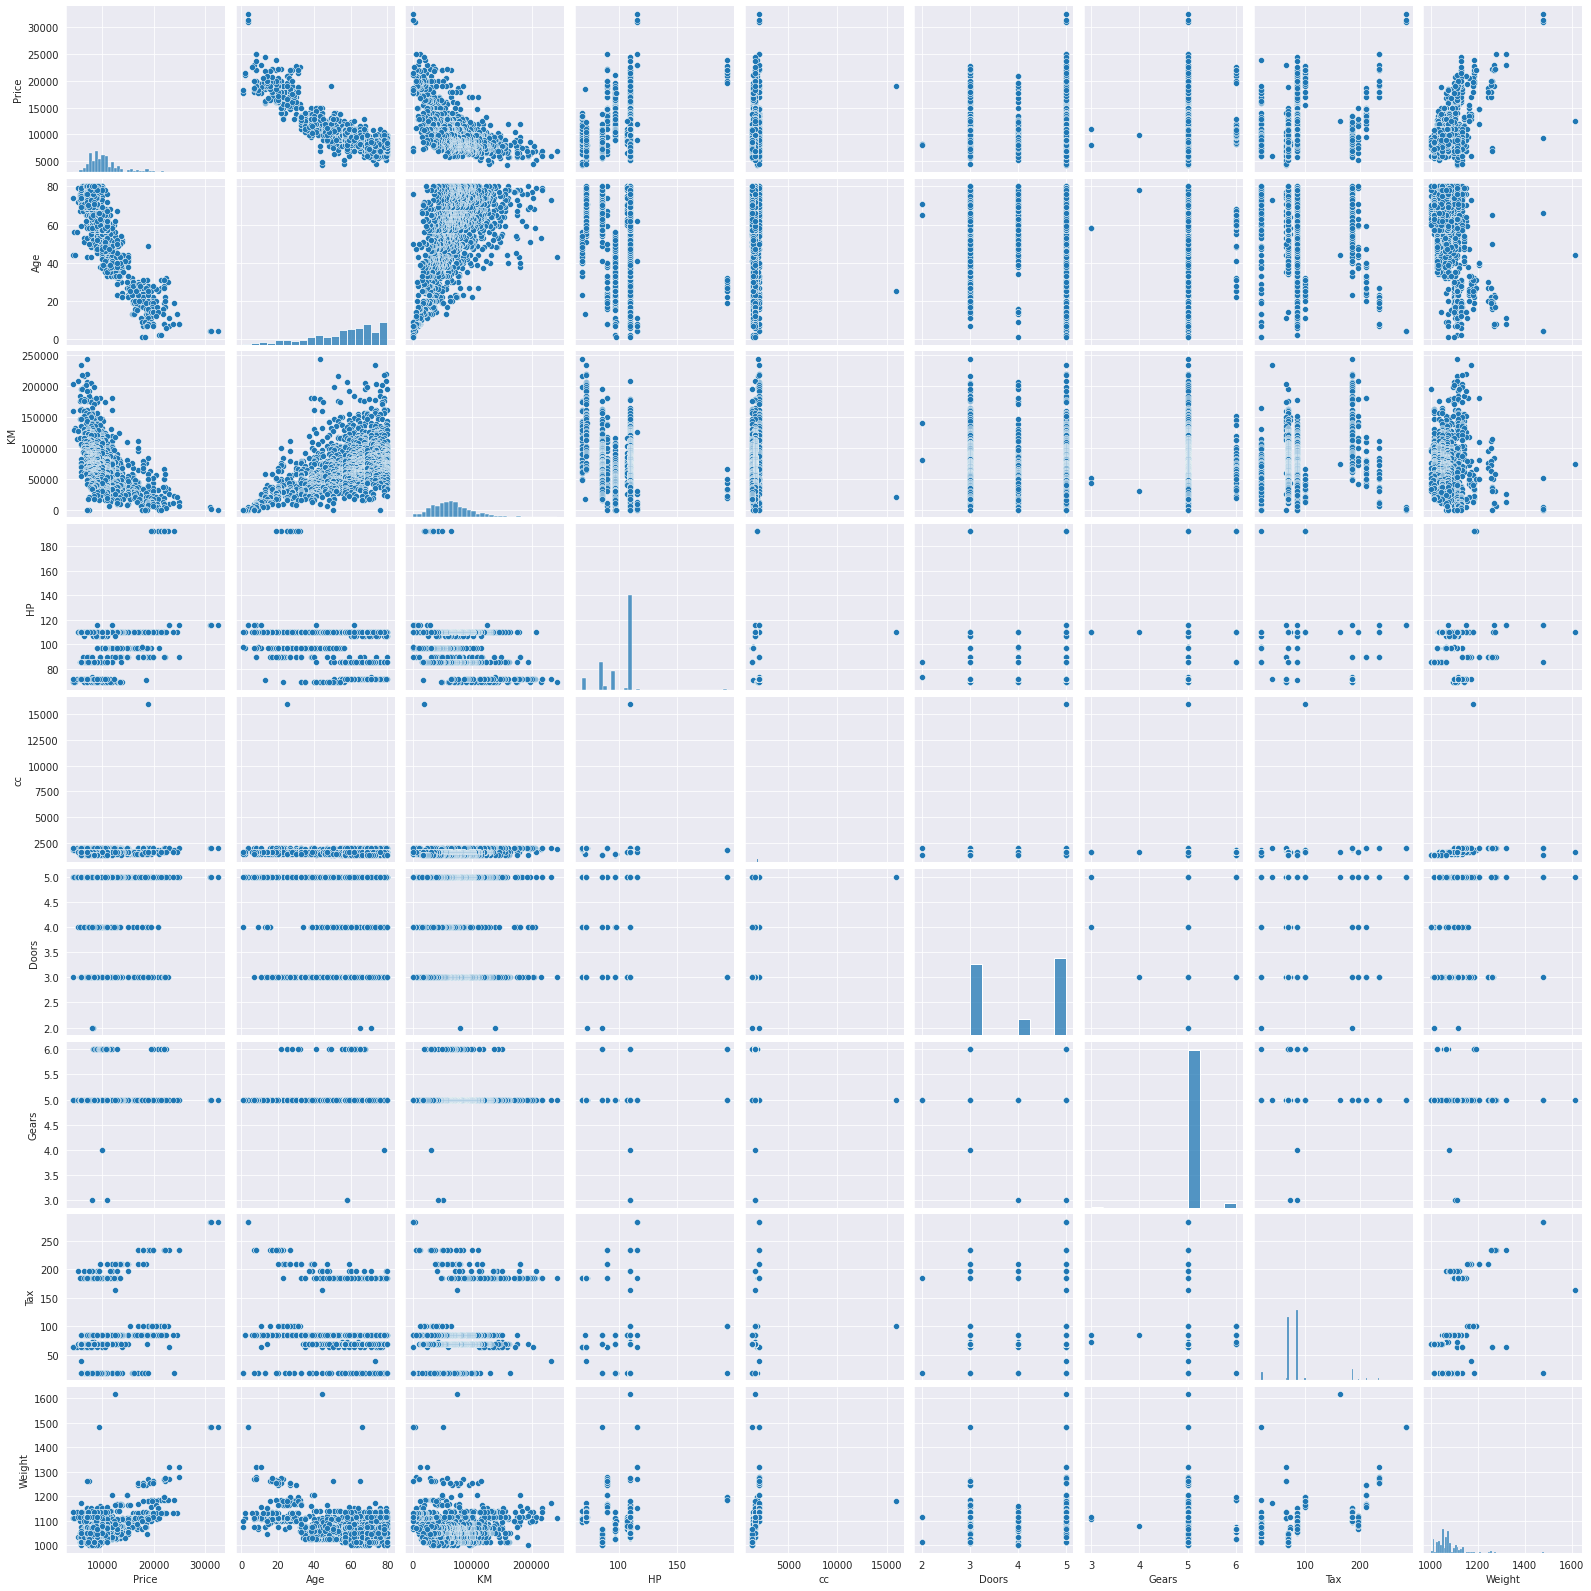

In [29]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

# Model Building

In [30]:
model=sfa.ols('Price~Age+KM+HP+Doors+Gears+Weight+cc+Tax', data=data3).fit()
model.params   #finding Parameters

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
Doors          -0.920189
Gears         597.715894
Weight         16.855470
cc             -0.118558
Tax             3.858805
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues)    #finding P-values

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
Doors        -0.023012
Gears         3.034563
Weight       15.760663
cc           -1.316436
Tax           2.944198
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
Doors         9.816443e-01
Gears         2.452430e-03
Weight        1.031118e-51
cc            1.882393e-01
Tax           3.290363e-03
dtype: float64


In [63]:
#cc and Doors have insignificant values as they have p-values greater than 0.05

In [70]:
#finding R-squared values
(model.rsquared, model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [37]:
lrm_Doors=sfa.ols('Price~Doors', data=data3).fit()
print(lrm_Doors.tvalues, '\n', lrm_Doors.pvalues) 

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [38]:
#Doors has significant p-value

# Model Validation

In [73]:
#Collinearity checking by calculating VIF
rsq_a=sfa.ols('Age~KM+HP+Doors+Gears+Weight+cc+Tax', data=data3).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=sfa.ols('KM~Age+HP+Doors+Gears+Weight+cc+Tax', data=data3).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_h=sfa.ols('HP~Age+KM+Doors+Gears+Weight+cc+Tax', data=data3).fit().rsquared
vif_h=1/(1-rsq_h)

rsq_d=sfa.ols('Doors~Age+KM+HP+Gears+Weight+cc+Tax', data=data3).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=sfa.ols('Gears~Age+KM+HP+Doors+Weight+cc+Tax', data=data3).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_w=sfa.ols('Weight~Age+KM+HP+Doors+Gears+cc+Tax', data=data3).fit().rsquared
vif_w=1/(1-rsq_w)

rsq_c=sfa.ols('cc~Age+KM+HP+Doors+Gears+Weight+Tax', data=data3).fit().rsquared
vif_c=1/(1-rsq_a)

rsq_t=sfa.ols('Tax~Age+KM+HP+Doors+Gears+Weight+cc+Tax', data=data3).fit().rsquared
vif_t=1/(1-rsq_a)

#storing above vif values in a data frame
d1={'Variables': ['Age','KM','HP','Doors','Gears','Weight','cc','Tax'], 
    'VIF':[vif_a,vif_k,vif_h,vif_d,vif_g,vif_w,vif_c,vif_t]}

Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Doors,1.155890
4,Gears,1.098843
5,Weight,2.487180
6,cc,1.876236
7,Tax,1.876236


In [40]:
# all the variables has VIF<10, means there is no collinearity

In [42]:
import statsmodels.api as sm

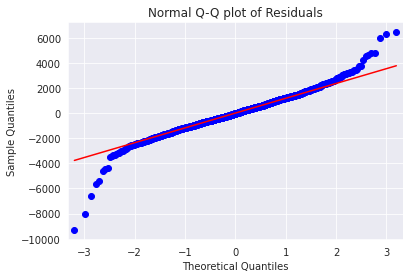

In [43]:
#Residual Analysis
qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [44]:
list(np.where(model.resid<-6000))   #Outlier point from above Q-Q plot

[array([220, 600, 959])]

In [45]:
list(np.where(model.resid>6000))    #Outlier point from above Q-Q plot

[array([109, 146, 522])]

In [46]:
#Plot for Homoscedosticity
def get_standardized_values( vals ): return (vals - vals.mean())/vals.std()

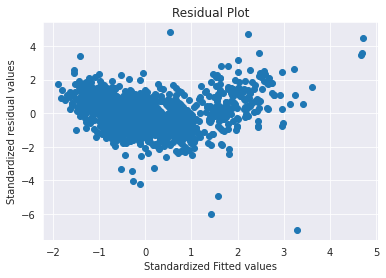

In [47]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


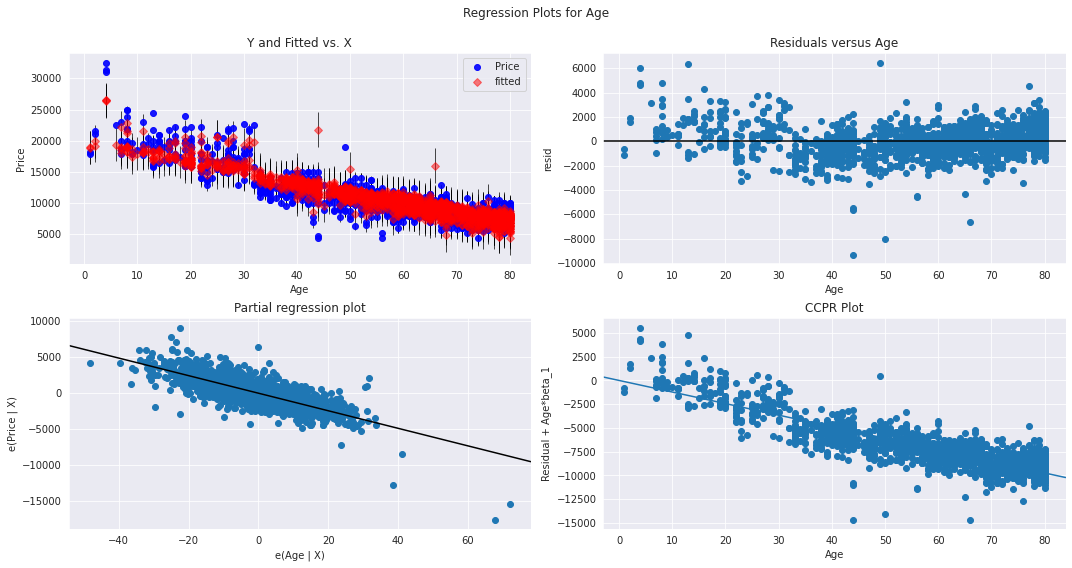

In [48]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

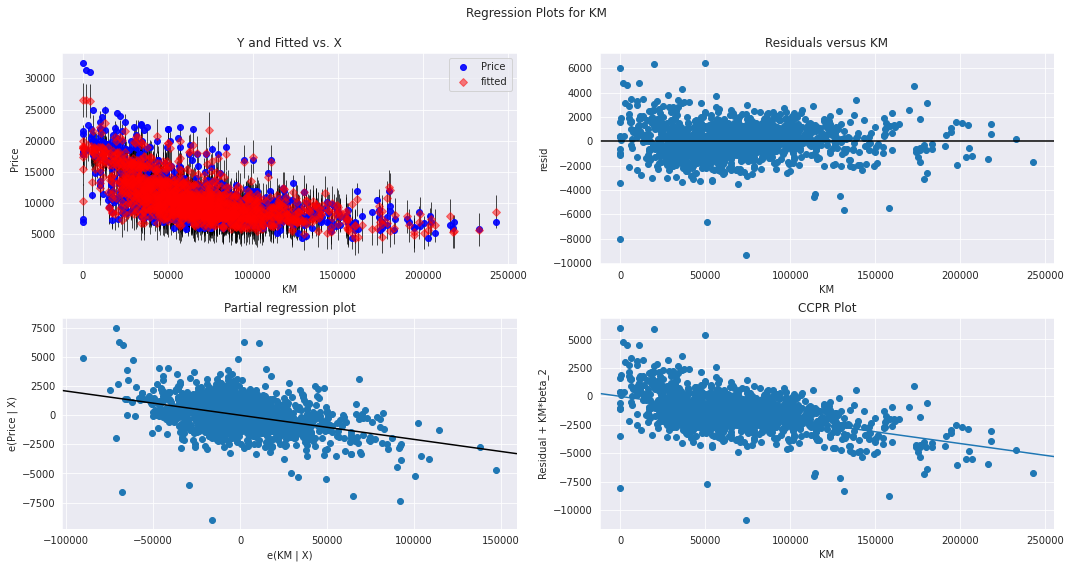

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

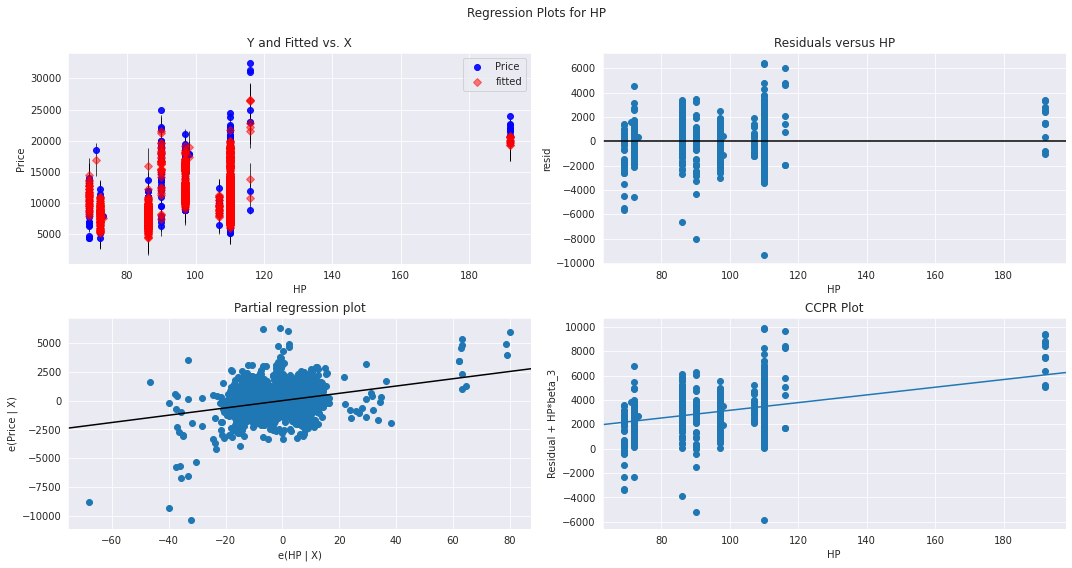

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

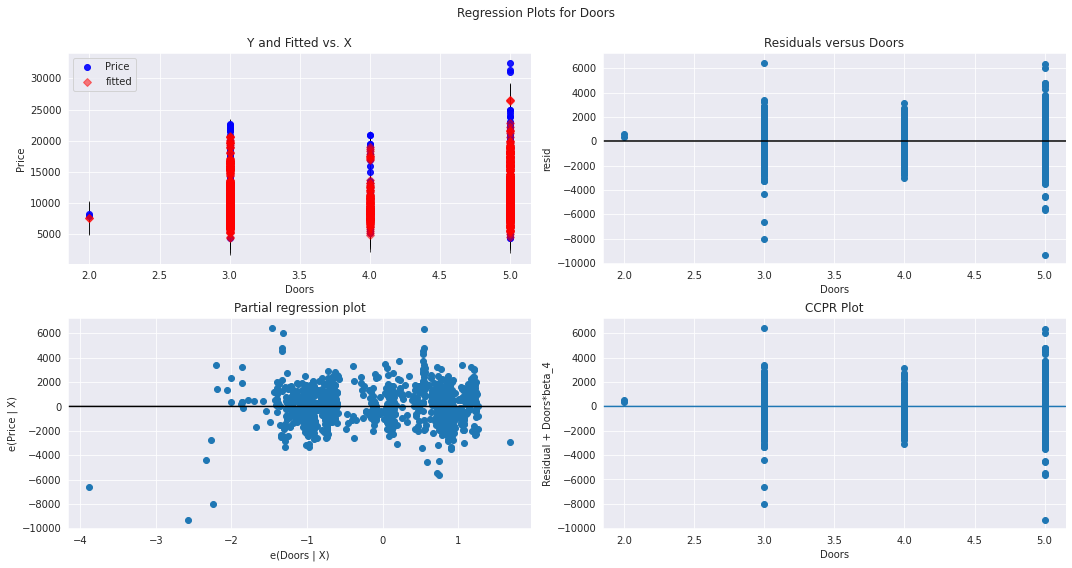

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

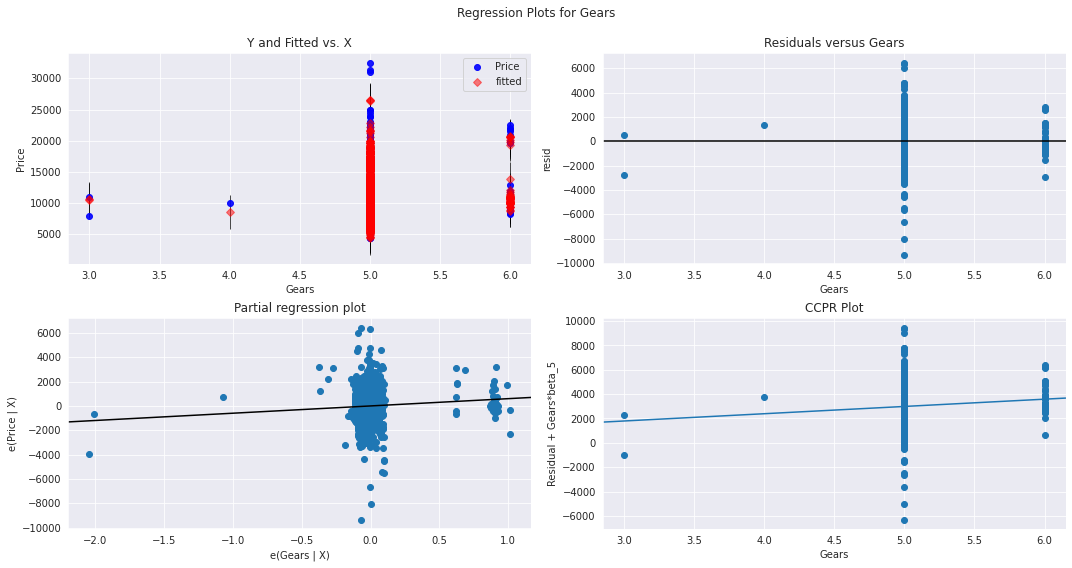

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

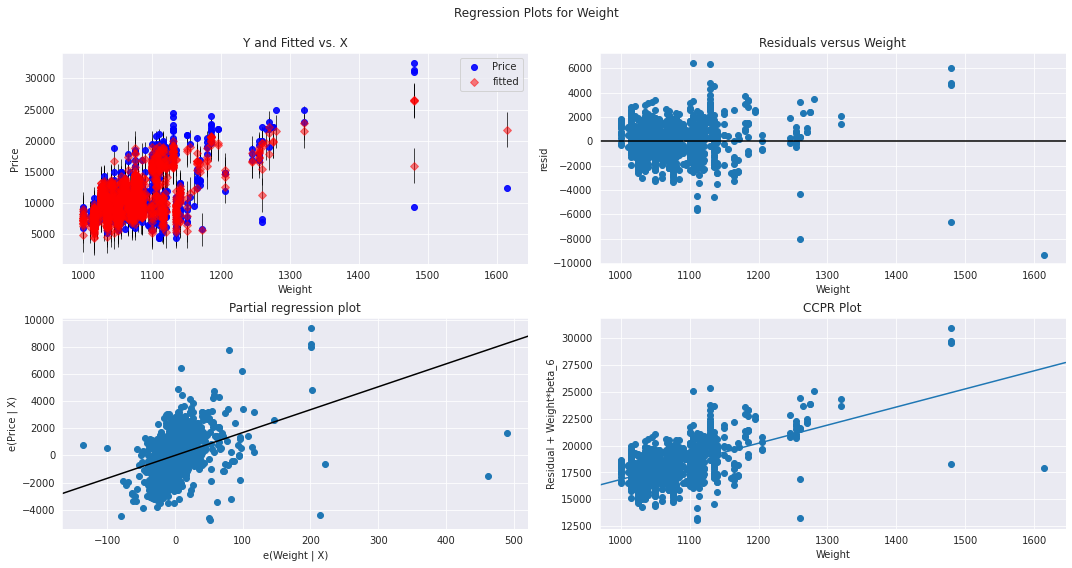

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

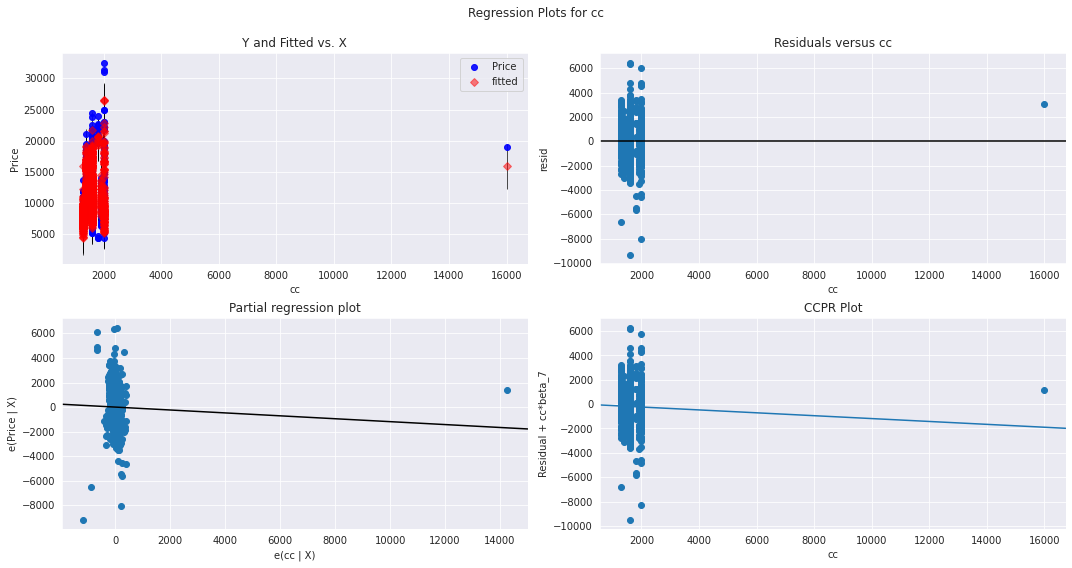

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

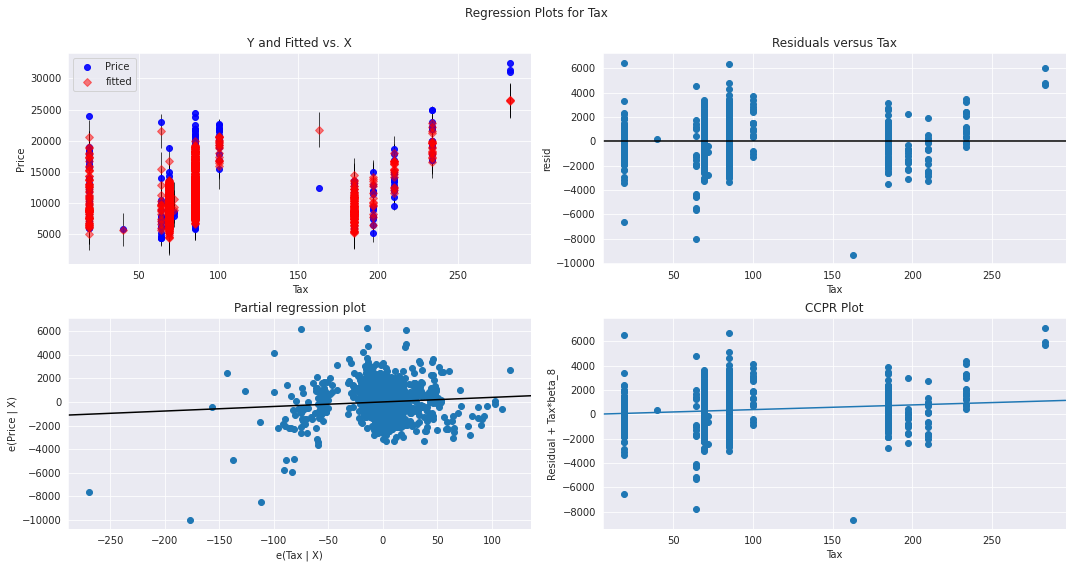

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Tax", fig=fig)
plt.show()

In [56]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c   # Cook's Distance>1 means there is a Outlier Or Influencer

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

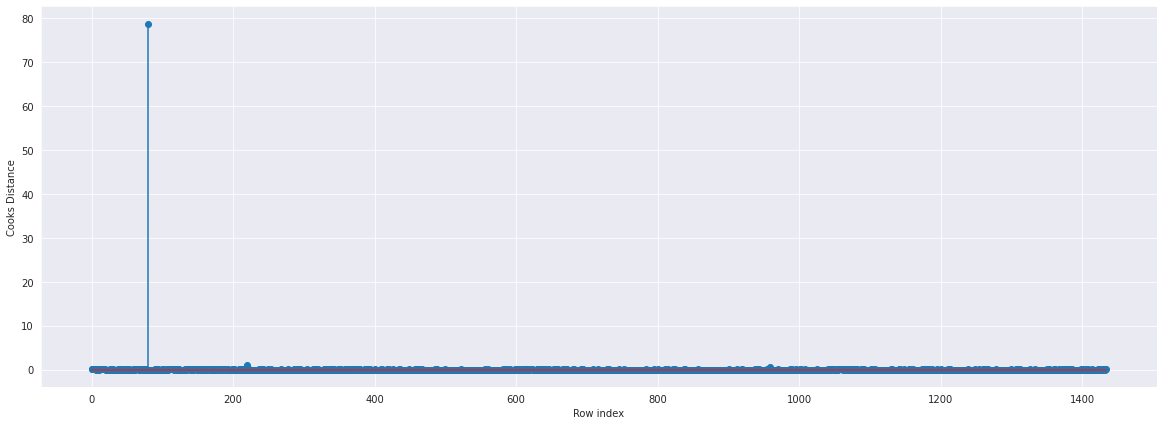

In [58]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
#Index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582255153)

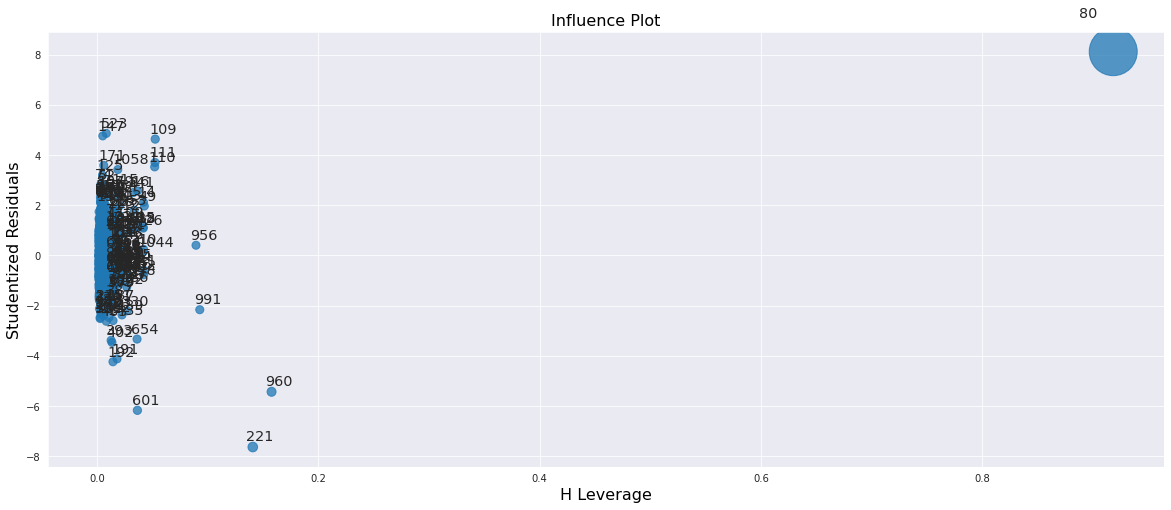

In [60]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(20,8))
fig = sm.graphics.influence_plot(model, ax= ax)

In [62]:
k = data3.shape[1]
n = data3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

0.020905923344947737

In [74]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [75]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data6=data3.drop(data3.index[[80]],axis=0).reset_index()
data6.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [76]:
#Checking Final model
final_model1=sfa.ols('Price~Age+KM+HP+Doors+Gears+Weight+cc+Tax', data=data6).fit()
(final_model1.rsquared, final_model1.aic)

(0.8681163912634053, 24669.363894157)